In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#reading the data
df_train= pd.read_csv('train.csv')
df_test= pd.read_csv('test.csv')

In [3]:
#setting index as id
df_train= df_train.set_index('id')
df_test= df_test.set_index('id')

In [4]:
#viewing first five rows of the dataset
df_train.head()

,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
id,,,,,,,,,,,,,
0,urban,2,0.06,35,daylight,rainy,False,True,afternoon,False,True,1,0.13
1,urban,4,0.99,35,daylight,clear,True,False,evening,True,True,0,0.35
2,rural,4,0.63,70,dim,clear,False,True,morning,True,False,2,0.30
3,highway,4,0.07,35,dim,rainy,True,True,morning,False,False,1,0.21
4,rural,1,0.58,60,daylight,foggy,False,False,evening,True,False,1,0.56


In [5]:
#viewing first few rows of test dataset
df_test.head()

,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents
id,,,,,,,,,,,,
517754,highway,2,0.34,45,night,clear,True,True,afternoon,True,True,1
517755,urban,3,0.04,45,dim,foggy,True,False,afternoon,True,False,0
517756,urban,2,0.59,35,dim,clear,True,False,afternoon,True,True,1
517757,rural,4,0.95,35,daylight,rainy,False,False,afternoon,False,False,2
517758,highway,2,0.86,35,daylight,clear,True,False,evening,False,True,3


In [6]:
#number of columns and data types in the train dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 517754 entries, 0 to 517753
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   road_type               517754 non-null  object 
 1   num_lanes               517754 non-null  int64  
 2   curvature               517754 non-null  float64
 3   speed_limit             517754 non-null  int64  
 4   lighting                517754 non-null  object 
 5   weather                 517754 non-null  object 
 6   road_signs_present      517754 non-null  bool   
 7   public_road             517754 non-null  bool   
 8   time_of_day             517754 non-null  object 
 9   holiday                 517754 non-null  bool   
 10  school_season           517754 non-null  bool   
 11  num_reported_accidents  517754 non-null  int64  
 12  accident_risk           517754 non-null  float64
dtypes: bool(4), float64(2), int64(3), object(4)
memory usage: 41.5+ MB


In [7]:
#number of columns and data types in the test dataset
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 172585 entries, 517754 to 690338
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   road_type               172585 non-null  object 
 1   num_lanes               172585 non-null  int64  
 2   curvature               172585 non-null  float64
 3   speed_limit             172585 non-null  int64  
 4   lighting                172585 non-null  object 
 5   weather                 172585 non-null  object 
 6   road_signs_present      172585 non-null  bool   
 7   public_road             172585 non-null  bool   
 8   time_of_day             172585 non-null  object 
 9   holiday                 172585 non-null  bool   
 10  school_season           172585 non-null  bool   
 11  num_reported_accidents  172585 non-null  int64  
dtypes: bool(4), float64(1), int64(3), object(4)
memory usage: 12.5+ MB


In [8]:
#summary statistics of numerical columns in train dataset
df_train.describe()

,num_lanes,curvature,speed_limit,num_reported_accidents,accident_risk
count,517754.000000,517754.000000,517754.000000,517754.000000,517754.000000
mean,2.491511,0.488719,46.112575,1.187970,0.352377
std,1.120434,0.272563,15.788521,0.895961,0.166417
min,1.000000,0.000000,25.000000,0.000000,0.000000
25%,1.000000,0.260000,35.000000,1.000000,0.230000
50%,2.000000,0.510000,45.000000,1.000000,0.340000
75%,3.000000,0.710000,60.000000,2.000000,0.460000
max,4.000000,1.000000,70.000000,7.000000,1.000000


In [9]:
#number of unique values in the columns
df_train.nunique()

road_type                   3
num_lanes                   4
curvature                 261
speed_limit                 5
lighting                    3
weather                     3
road_signs_present          2
public_road                 2
time_of_day                 3
holiday                     2
school_season               2
num_reported_accidents      8
accident_risk              98
dtype: int64

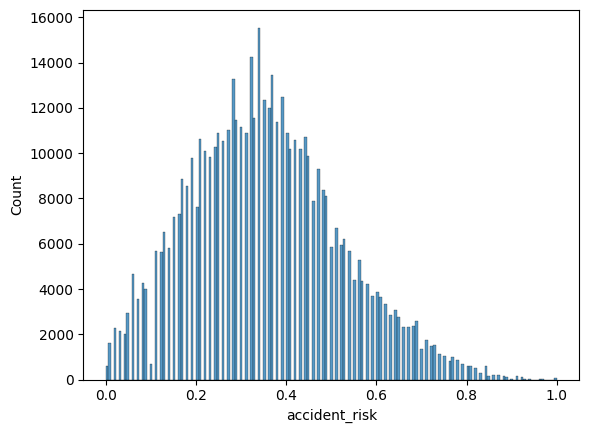

In [10]:
#plotting histogram for target variable in train dataset
sns.histplot(data= df_train, x='accident_risk')
plt.show()

The distribution is skewed towards the right. We apply log transformation to fix this.

In [11]:
df_train['accident_risk']= np.log1p(df_train['accident_risk'])

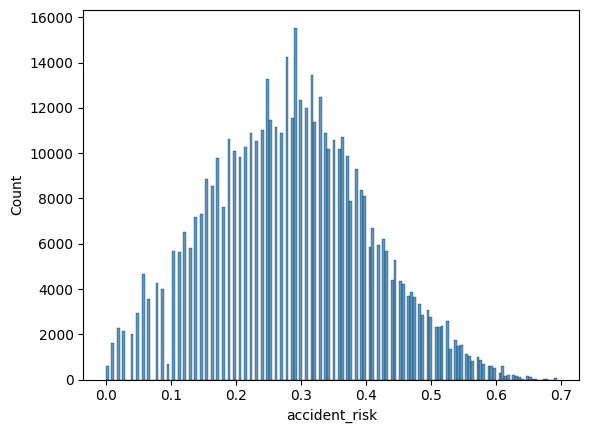

In [12]:
#plotting histogram for target variable in train dataset after the fix
sns.histplot(data= df_train, x='accident_risk')
plt.show()